In [ ]:
from selenium import webdriver
from selenium.webdriver.edge.options import Options as EdgeOptions

# 指定 EdgeDriver 的路径
driver_path = 'C:\\path\\to\\msedgedriver.exe'  # 请根据实际情况修改路径

# 创建 Edge 选项
edge_options = EdgeOptions()
edge_options.headless = True  # 启动时无头模式

# 创建 WebDriver 实例
edge = webdriver.Edge(executable_path=driver_path, options=edge_options)

# 访问指定 URL
page = edge.get('http://baidu.com')

# 打印页面源码
print(edge.page_source)

# 关闭浏览器
edge.quit()

# 数据获取

In [ ]:
# 爬虫实现 基础
# 以及部分实战
import requests
import selenium
# Url管理 网页下载器 网页解析器
url="https://www.baidu.com"

r=requests.get(url)

print(r.text)

In [ ]:
r.encoding
r.status_code

In [ ]:
import bs4
import requests


# html_doc= requests.get('http://www.baidu.com').text
# # 根据网页源码分析，得到ur
# soup= bs4.BeautifulSoup(
#     html_doc, #html文档字符串
#     'html.parser' #解析器
#     from_encoding= 'utf-8'
#     )
# # 查找标签 cllass'  文字为Python的节点
# # soup.find_all(name,attrs=,string=)
# soup.find_all('a')


# node= soup.find_all('a')[0]
# node.name
# node['href']
# node.get_text()

with open("./index.html",encoding='utf-8') as fin:
    html_doc= fin.read()
# 从某个区块去找
# div_node= bs4.BeautifulSoup(html_doc, 'html.parser').find('div',id='content')
# links= div_node.find_all('a')

soup= bs4.BeautifulSoup(html_doc, 'html.parser')
links= soup.find_all('a')
for link in links:
    print(link.name)
    print(link.get_text())
    print(link['href'])

img=soup.find('img')
print(img)
print(img["src"])


# 探索性数据分析

In [1]:
## 探索性数据分析
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data=pd.read_feather('house_sales.ftr')
data.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,Well Disclosure,remodeled,DOH2,SerialX,Full Baths,Tax Legal Lot Number,Tax Legal Block Number,Tax Legal Tract Number,Building Name,Zip
0,2080183300,"11205 Monterey,","$2,000,000",01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,95046
1,20926300,"5281 Castle Rd,","$2,100,000",02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,None,None,None,None,None,None,None,None,None,91011
2,19595300,"3581 Butcher Dr,","$1,125,000",11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,None,None,None,None,None,None,None,None,None,95051
3,300472200,"2021 N Milpitas Blvd,","$36,250,000",10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,None,None,None,None,None,None,None,None,None,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,","$140,000",10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,None,None,None,None,None,None,None,None,None,92561


In [2]:
data.shape

(164944, 1789)

In [3]:
# 去掉缺失数据
null_sum=data.isnull().sum() # 统计每列的缺失值个数
data.columns[null_sum<len(data)*0.3] # 保留缺失值比例小于0.3的列

Index(['Id', 'Address', 'Sold Price', 'Sold On', 'Summary', 'Type',
       'Year built', 'Heating', 'Cooling', 'Parking', 'Bedrooms', 'Bathrooms',
       'Total interior livable area', 'Total spaces', 'Garage spaces',
       'Home type', 'Region', 'Elementary School', 'Elementary School Score',
       'Elementary School Distance', 'High School', 'High School Score',
       'High School Distance', 'Heating features', 'Parking features',
       'Lot size', 'Parcel number', 'Tax assessed value', 'Annual tax amount',
       'Listed On', 'Listed Price', 'Zip'],
      dtype='object')

In [4]:
# 使用drop函数去掉缺失值比例超过30%的特征 这个只能跑一次
data.drop(columns=data.columns[null_sum>len(data)*0.3],inplace=True)

In [5]:
# 查看数据类型 筛选不合适的数据
data.dtypes

Id                             object
Address                        object
Sold Price                     object
Sold On                        object
Summary                        object
Type                           object
Year built                     object
Heating                        object
Cooling                        object
Parking                        object
Bedrooms                       object
Bathrooms                      object
Total interior livable area    object
Total spaces                   object
Garage spaces                  object
Home type                      object
Region                         object
Elementary School              object
Elementary School Score        object
Elementary School Distance     object
High School                    object
High School Score              object
High School Distance           object
Heating features               object
Parking features               object
Lot size                       object
Parcel numbe

In [6]:
# 数据转换 以Sold Price为例 其他同理
curren=['Sold Price','Listed Price','Tax assessed value','Annual tax amount','Bathrooms','Total spaces','Garage spaces','Elementary School Score','High School Score']
for c in curren:
    data[c]=data[c].str.replace(
    r'[$,-]','',regex=True).replace(
        r'^\s*$',np.nan,regex=True).astype(float)

In [7]:
areas = ['Total interior livable area', 'Lot size']

for area in areas:
    # 检查是否包含“Acres”
    acres = data[area].str.contains('Acres') == True
    
    # 替换单位并转换为浮点数
    col = data[area].str.replace(r'\b sqft\b|\b Acres\b|\b,\b', '', regex=True).astype(float)
    
    # 将包含“Acres”的行转换为平方英尺
    col[acres] *= 43560
    
    # 更新 DataFrame
    data[area] = col

In [8]:
data.dtypes

Id                              object
Address                         object
Sold Price                     float64
Sold On                         object
Summary                         object
Type                            object
Year built                      object
Heating                         object
Cooling                         object
Parking                         object
Bedrooms                        object
Bathrooms                      float64
Total interior livable area    float64
Total spaces                   float64
Garage spaces                  float64
Home type                       object
Region                          object
Elementary School               object
Elementary School Score        float64
Elementary School Distance      object
High School                     object
High School Score              float64
High School Distance            object
Heating features                object
Parking features                object
Lot size                 

In [9]:
data.head()

,Id,Address,Sold Price,Sold On,Summary,Type,Year built,Heating,Cooling,Parking,...,High School Distance,Heating features,Parking features,Lot size,Parcel number,Tax assessed value,Annual tax amount,Listed On,Listed Price,Zip
0,2080183300,"11205 Monterey,",2000000.0,01/31/20,"11205 Monterey, San Martin, CA 95046 is a sing...",SingleFamily,No Data,No Data,No Data,0 spaces,...,1.4,None,None,NaN,None,NaN,NaN,None,NaN,95046
1,20926300,"5281 Castle Rd,",2100000.0,02/25/21,Spectacular Mountain and incredible L.A. City ...,SingleFamily,1951,Central,"Central Air, Dual","Driveway, Driveway - Brick",...,1.2,Central,"Driveway, Driveway - Brick",13168.0,5870016003,1829308.0,22330.0,1/13/2021,1950000.0,91011
2,19595300,"3581 Butcher Dr,",1125000.0,11/06/19,Eichler Style home! with Santa Clara High! in ...,SingleFamily,1954,Central Forced Air - Gas,Central AC,"Garage, Garage - Attached, Covered",...,0.8,"Forced air, Gas","Garage, Garage - Attached, Covered",4795.0,29022100,1125000.0,13472.0,9/2/2019,1299888.0,95051
3,300472200,"2021 N Milpitas Blvd,",36250000.0,10/02/20,"2021 N Milpitas Blvd, Milpitas, CA 95035 is a ...",Apartment,1989,Other,No Data,"Mixed, Covered",...,0.9,Other,"Mixed, Covered",178596.0,02201015,14521205.0,175211.0,None,NaN,95035
4,2074492000,"LOT 4 Tool Box Spring Rd,",140000.0,10/19/20,Beautiful level lot dotted with pine trees ro...,VacantLand,No Data,No Data,No Data,0 spaces,...,25.8,None,None,NaN,None,NaN,NaN,None,NaN,92561


In [10]:
data.describe()

,Sold Price,Bathrooms,Total interior livable area,Total spaces,Garage spaces,Elementary School Score,High School Score,Lot size,Tax assessed value,Annual tax amount,Listed Price
count,1.648590e+05,141791.000000,1.465450e+05,156738.000000,156736.000000,145676.000000,144511.000000,1.358450e+05,1.450650e+05,1.433500e+05,1.250060e+05
mean,1.194842e+06,2.303087,3.182221e+03,1.706938,1.608507,5.654892,6.086485,9.525061e+05,8.898781e+05,1.123415e+04,1.197671e+06
std,3.336365e+06,1.646634,4.609881e+05,28.802189,28.782320,2.098547,2.033379,1.357197e+08,3.126888e+06,3.859389e+04,2.874721e+06
min,1.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,4.350000e+05,2.000000,1.170000e+03,0.000000,0.000000,4.000000,5.000000,4.800000e+03,2.550000e+05,3.434250e+03,4.990000e+05
50%,8.050000e+05,2.000000,1.558000e+03,1.000000,1.000000,6.000000,6.000000,6.603000e+03,5.635010e+05,7.372000e+03,8.490000e+05
75%,1.370000e+06,3.000000,2.144000e+03,2.000000,2.000000,7.000000,8.000000,1.209000e+04,1.033832e+06,1.321300e+04,1.395000e+06
max,8.660000e+08,256.000000,1.764164e+08,9999.000000,9999.000000,10.000000,10.000000,4.856770e+10,8.256328e+08,9.977342e+06,6.250000e+08


In [13]:
# 去掉房间过大和过小的
abnormal = (data[areas[1]]<10)|(data[areas[1]]>1e4)
data=data[abnormal==False]
sum(abnormal)

0

C:\Users\22388\AppData\Local\Temp\ipykernel_16036\2883342094.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()])


[Text(3.0, 0, '1e+03'),
 Text(4.0, 0, '1e+04'),
 Text(5.0, 0, '1e+05'),
 Text(6.0, 0, '1e+06'),
 Text(7.0, 0, '1e+07'),
 Text(8.0, 0, '1e+08')]

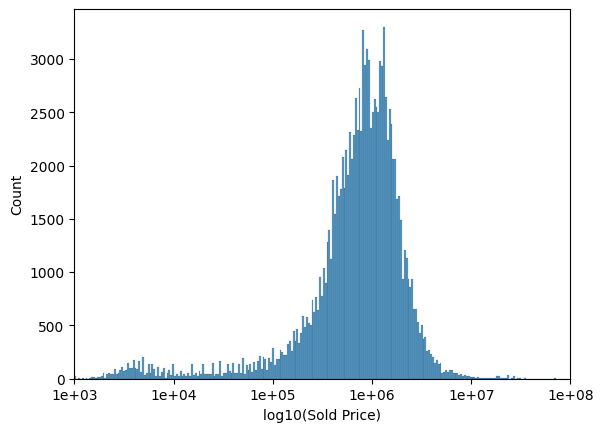

In [14]:
# 卖价 展示
ax=sns.histplot(np.log10(data['Sold Price']))
ax.set_xlim([3,8])
ax.set_xlabel('log10(Sold Price)')
ax.set_xticklabels(['%.0e'%a for a in 10**ax.get_xticks()])

In [16]:
# 查找房子种类
data['Type'].value_counts()[0:20]

Type
SingleFamily            74318
Condo                   18749
MultiFamily              6586
VacantLand               6199
Townhouse                5846
Unknown                  5390
MobileManufactured       2588
Apartment                1416
Cooperative               161
Residential Lot            75
Single Family              69
Single Family Lot          56
Acreage                    48
2 Story                    39
3 Story                    25
Hi-Rise (9+), Luxury       21
Condominium                19
Duplex                     19
RESIDENTIAL                19
Mid-Rise (4-8)             17
Name: count, dtype: int64

In [ ]:
# 不同房子的价格分布 其他的可视化
types=data['Type'].isin()
...

## 数据操作+数据预处理

In [3]:
## 数据操作 N维数组是机器学习和神经网络的主要数据结构

import torch

# 张量表示一个数值组成的数组 可能有多个维度
x=torch.arange(24)
x

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23])

In [4]:
# shape访问张量的形状和张量中元素的总数
x.shape 

torch.Size([24])

In [5]:
x.numel()

24

In [6]:
# reshpae函数 改变数据的形状 而不改变元素数量
x=x.reshape(4,6)
x

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]])

In [ ]:
# 设置全0
torch.zeros((1,2))

tensor([[0., 0.]])

In [12]:
x.shape

torch.Size([4, 6])

In [25]:
y=torch.tensor([[1,2,3,4,5,6]])
# 多个张量连结 dim=0 0为行，1为列
torch.cat((x,y),dim=0)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 1,  2,  3,  4,  5,  6]])

In [15]:
x.sum()

tensor(276)

In [20]:
a=torch.arange(2).reshape((2,1))
b=torch.arange(4).reshape((2,2))
a,b

(tensor([[0],
         [1]]),
 tensor([[0, 1],
         [2, 3]]))

In [21]:
a+b

tensor([[0, 1],
        [3, 4]])

In [24]:
x[:1],x[1:3]

(tensor([[0, 1, 2, 3, 4, 5]]),
 tensor([[ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17]]))

In [26]:
A=x.numpy()
B=torch.tensor(A)

A,B

(array([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]),
 tensor([[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]))

In [34]:
import os

# 创建目录
os.makedirs(os.path.join('.', 'data'), exist_ok=True)
data_file = os.path.join('.', 'data', 'data.csv')

try:
    with open(data_file, 'w') as f:
        f.write('NumRooms,Alley,Price\n')  # 列名
        f.write('NA,Pave,127500\n')  # 4个数据记录
        f.write('2,NA,106000\n')
        f.write('4,NA,178100\n')
        f.write('NA,NA,140000\n')
    print(f"File '{data_file}' created successfully.")
except Exception as e:
    print(f"Failed to create file: {e}")

File '.\data\data.csv' created successfully.


In [44]:
import pandas as pd

data = pd.read_csv("./data/data.csv")
print(data)

   NumRooms Alley   Price
0       NaN  Pave  127500
1       2.0   NaN  106000
2       4.0   NaN  178100
3       NaN   NaN  140000


In [52]:
# 处理缺失数据 插值
input, output = data.iloc[:, 0:2], data.iloc[:, 2]

# 处理数值列（NumRooms）
num_rooms = input['NumRooms']
num_rooms = num_rooms.fillna(num_rooms.mean()).round().astype(int)

# 处理分类列（Alley）
alley = input['Alley']
alley = alley.fillna(alley.mode().iloc[0])  # 用众数填充缺失值

# 合并处理后的列
input = pd.concat([num_rooms, alley], axis=1)

In [53]:
print(input)
print(output)

   NumRooms Alley
0         3  Pave
1         2  Pave
2         4  Pave
3         3  Pave
0    127500
1    106000
2    178100
3    140000
Name: Price, dtype: int64
